In [ ]:
# CNN with 1 Convolutional Layer

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(12345)
%matplotlib inline


/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 512

train_images_path = keras.utils.get_file('train-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz')
train_labels_path = keras.utils.get_file('train-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz')
test_images_path = keras.utils.get_file('t10k-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz')
test_labels_path = keras.utils.get_file('t10k-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz')


In [3]:
def load_mnist(images_path, labels_path):
    import os
    import gzip
    import numpy as np

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [4]:
X_train_orig, y_train_orig = load_mnist(train_images_path, train_labels_path)
X_test, y_test = load_mnist(test_images_path, test_labels_path)
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

In [5]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)


(48000, 784)
(48000,)
(12000, 784)
(12000,)


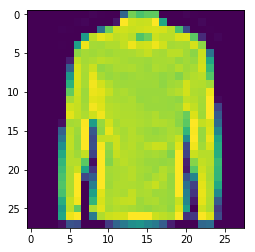

In [8]:
plt.imshow(X_train[1, :].reshape((28, 28)))


In [9]:
# CNN with 1 Convolutional Layer

In [10]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)


In [11]:
cnn1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

In [12]:
cnn1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [13]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 22s 452us/step - loss: 0.6292 - acc: 0.7854 - val_loss: 0.4130 - val_acc: 0.8573
Epoch 2/10
48000/48000 [==============================] - 22s 459us/step - loss: 0.3971 - acc: 0.8609 - val_loss: 0.3575 - val_acc: 0.8743
Epoch 3/10
48000/48000 [==============================] - 23s 487us/step - loss: 0.3529 - acc: 0.8758 - val_loss: 0.3289 - val_acc: 0.8852
Epoch 4/10
48000/48000 [==============================] - 21s 439us/step - loss: 0.3236 - acc: 0.8869 - val_loss: 0.3096 - val_acc: 0.8916
Epoch 5/10
48000/48000 [==============================] - 22s 463us/step - loss: 0.3054 - acc: 0.8903 - val_loss: 0.2842 - val_acc: 0.9013
Epoch 6/10
48000/48000 [==============================] - 22s 457us/step - loss: 0.2847 - acc: 0.8980 - val_loss: 0.2721 - val_acc: 0.9073
Epoch 7/10
48000/48000 [==============================] - 21s 446us/step - loss: 0.2729 - acc: 0.9014 - val_loss: 0.

In [14]:
cnn1.optimizer.lr = 0.0001

In [15]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 19s 401us/step - loss: 0.2297 - acc: 0.9164 - val_loss: 0.2468 - val_acc: 0.9136
Epoch 2/10
48000/48000 [==============================] - 20s 424us/step - loss: 0.2253 - acc: 0.9172 - val_loss: 0.2369 - val_acc: 0.9170
Epoch 3/10
48000/48000 [==============================] - 19s 394us/step - loss: 0.2181 - acc: 0.9207 - val_loss: 0.2329 - val_acc: 0.9178
Epoch 4/10
48000/48000 [==============================] - 19s 394us/step - loss: 0.2073 - acc: 0.9244 - val_loss: 0.2336 - val_acc: 0.9181
Epoch 5/10
48000/48000 [==============================] - 19s 393us/step - loss: 0.1987 - acc: 0.9287 - val_loss: 0.2416 - val_acc: 0.9131
Epoch 6/10
48000/48000 [==============================] - 19s 394us/step - loss: 0.1968 - acc: 0.9280 - val_loss: 0.2250 - val_acc: 0.9211
Epoch 7/10
48000/48000 [==============================] - 19s 393us/step - loss: 0.1877 - acc: 0.9308 - val_loss: 0.

In [16]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2557422494411469
Test accuracy: 0.9101


In [17]:
# Data Augmentation

In [18]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)

In [19]:
cnn1.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50,
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)

Epoch 1/50
93/93 [==============================] - 27s 288ms/step - loss: 0.4757 - acc: 0.8228 - val_loss: 0.4029 - val_acc: 0.8525
Epoch 2/50
93/93 [==============================] - 26s 283ms/step - loss: 0.4126 - acc: 0.8460 - val_loss: 0.3727 - val_acc: 0.8640
Epoch 3/50
93/93 [==============================] - 28s 296ms/step - loss: 0.3949 - acc: 0.8517 - val_loss: 0.3635 - val_acc: 0.8669
Epoch 4/50
93/93 [==============================] - 27s 295ms/step - loss: 0.3773 - acc: 0.8585 - val_loss: 0.3544 - val_acc: 0.8699
Epoch 5/50
93/93 [==============================] - 31s 336ms/step - loss: 0.3674 - acc: 0.8648 - val_loss: 0.3449 - val_acc: 0.8753
Epoch 6/50
93/93 [==============================] - 30s 319ms/step - loss: 0.3579 - acc: 0.8684 - val_loss: 0.3393 - val_acc: 0.8786
Epoch 7/50
93/93 [==============================] - 29s 312ms/step - loss: 0.3547 - acc: 0.8685 - val_loss: 0.3307 - val_acc: 0.8828
Epoch 8/50
93/93 [==============================] - 28s 303ms/step - 

In [20]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.24125416670441627
Test accuracy: 0.9156


In [22]:
cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
